# 1- Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 2- Loading The dataset

In [2]:
# Loading the dataset that we will work with
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


As we can see we have some NaN values so we have a lot of work to do with preprocessing this dataset.

We can also see Item_Visibility Column has numerical values equal to 0 which isn't very effiecnt to train the model on so we will adjust it later in our pre processing.

# 3- Discovering our dataset

In [3]:
# Performing Statistical Describtion on our dataframe to know more about our dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From what we seeing right now we discovered from our statistical describtion that we have null values on Item_Weights we will be using the mean to fill the missing records on the dataset.

In [4]:
# Discovering the datatypes of our datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Here we discovered that our dataset has 7 catergorical features, 5 numercial features (4 float, 1 integer)

Also we can see here that we have 2 columns with missing values (Item_Weight, Outlet_Size)

In [5]:
# Here we try to check the number of unique values in every column in the dataset
for column in df:
    print(f'{column} : {len(df[column].unique())}')

Item_Identifier : 1559
Item_Weight : 416
Item_Fat_Content : 5
Item_Visibility : 7880
Item_Type : 16
Item_MRP : 5938
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 4
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493


We will not be using the Item_Identifier and Outlet_Identifier since they don't matter that much in training our model



In [6]:
# Checking how many null values are in each column

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Collecting the categorical features into 1 list to prepare it for 
categorical_features = []

#select_dtypes -> built-in method in pandas library that returns a dataframe of columns with type object only
#columns -> returns the column names
#tolist -> convert column names into list
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
        
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

As we said previously from our analysis we will not be using Item_Identifier or Outlet_Identifier so we will remove them from our list

In [8]:
# Removing the unneccessary features that we won't use in our training
categorical_features.remove('Item_Identifier')
categorical_features.remove('Outlet_Identifier')

# Removing them also from our dataframe
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

Now we have only 5 categorical features to work with we will make some analysis on those features and after that we will start our preprocessing stage

In [9]:
# We will print the categorical columns values to check if there are redundant unique values or what

for column in categorical_features:
    print(df[column].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64



From the Item_Fat_content we can see that there are redundant unique values such as Low Fat = LF = low fat and also Regular = reg so we need to combine them since they are representing the same information

# 4- Preproccesing our dataset

In [10]:
# We will start by filling out our null values in the dataset we have 2 columns with null
# Numerical column -> Item_Weight -> we will handle it by using the mean value
# Categorical column -> Outlet_Size -> we will handle it by using the mode

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We have filled the null values of our features and we can clearly see that there are no more null values in our dataset but previously when we were discovering our dataset we saw that Item_Visibility feature has 0 values which can affect our model and make it biased so we have to take the mean and adjust those 0 values but to make sure that we have 0 values we are going to check first using the sum function

In [11]:
sum(df['Item_Visibility'] == 0)

526

We can see that we have 526 values equal to zero and that will hard affect our model so we are going to use the mean value to fill that

In [12]:
# we will use the replace function to replace the 0 value with the mean of the Item_Visibility Column
# we used the loc method to go through all rows in the Item_Visibility Column
# inplace means that keep the changes into the original dataframe
df.loc[:, 'Item_Visibility'].replace([0], df['Item_Visibility'].mean(), inplace = True)

Lets recap what we have done for preproccesing so far:

1- Filling the null values of features.

2- Filling the zeros in Item_Visibility with the mean value of it to make the model better.

Up Next:

* We are going to aggregate the redundant values in Item_Fat_Content that we discovered earlier since they mean the same and to make it easier for the model.

* We are going to adjust the Outlet_Establishment_Year since the model might give it high weight because it is value is big

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [14]:
# Creating smaller values for Outlet_Establishment_Year
# since this dataset was collected at 2013 we will subtract the value from 2013

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

# Dropping the Outlet_Establishment_Year column since we don't need it anymore
df = df.drop(columns = ['Outlet_Establishment_Year'])

In [15]:
df.info()

for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_Years          8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB
Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Cann

Now we are going to Encode our object features using label encoder and one hot encoder
 * We will use label encoder with categorical features that has 2 values
 * We will use One Hot Encoder with categorical features that has more than 2 values

In [16]:
# Label Encoder
labelencoder = LabelEncoder()
df['Item_Fat_Content'] = labelencoder.fit_transform(df['Item_Fat_Content'])

categorical_features.remove('Item_Fat_Content')

df = pd.get_dummies(df, columns = categorical_features, dtype=float)

print("Data after encoding:")
print(df.info())

Data after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Outlet_Years                     8523 non-null   int64  
 6   Item_Type_Baking Goods           8523 non-null   float64
 7   Item_Type_Breads                 8523 non-null   float64
 8   Item_Type_Breakfast              8523 non-null   float64
 9   Item_Type_Canned                 8523 non-null   float64
 10  Item_Type_Dairy                  8523 non-null   float64
 11  Item_Type_Frozen Foods           8523 non-null   float64
 12 

In [17]:
# Identify numerical features
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years', 'Item_Outlet_Sales']

for feature in numerical_features:
    feature_max = df[feature].max()
    feature_min = df[feature].min()
    print(f"Range of {feature}: {feature_min} to {feature_max}")


Range of Item_Weight: 4.555 to 21.35
Range of Item_Visibility: 0.003574698 to 0.328390948
Range of Item_MRP: 31.29 to 266.8884
Range of Outlet_Years: 4 to 28
Range of Item_Outlet_Sales: 33.29 to 13086.9648


After looking at the range of numerical features values we clearly see that we need to scale our values

We will be using 2 scalers:

* Item_Weight -> Standard Scaler
* Item_MRP -> StandardScaler 
* Outlet_Years -> StandardScaler
* Item_Visibility -> MinMaxScaler, Since the values are small with potential right skew
* Item_Outlet_Sales -> MinMaxScaler, because the model will benefit from having the target in a [0,1] range for better price prediction

In [18]:
# Separate features and target
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Scale features
X_train[['Item_Weight', 'Item_MRP', 'Outlet_Years']] = scaler_standard.fit_transform(
    X_train[['Item_Weight', 'Item_MRP', 'Outlet_Years']]
)
X_test[['Item_Weight', 'Item_MRP', 'Outlet_Years']] = scaler_standard.transform(
    X_test[['Item_Weight', 'Item_MRP', 'Outlet_Years']]
)

X_train[['Item_Visibility']] = scaler_minmax.fit_transform(X_train[['Item_Visibility']])
X_test[['Item_Visibility']] = scaler_minmax.transform(X_test[['Item_Visibility']])

# Scale target
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

Why do we scaled the data after splitting -> because If we scale the entire dataset before splitting, the test data may "leak" information from the training data, leading to overly optimistic model performance estimates. (ChatGpt recommendation)

# 5- Making the neural network architecture and training it 

In [20]:
# Preparing the structure of our model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # we used Linear activation for regression
])

# During training Dropout randomly "drops" (sets to zero) a fraction of neurons in a layer at each training iteration.
# This means that during any given forward pass, a certain percentage of neurons are temporarily removed from the network.
# Dropout prevent overfitting
# 0.2 = 20% of the layer neurons

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [22]:
# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,         # Number of epochs to wait for improvement
    restore_best_weights=True  # Rollback to the best model weights
)

In [23]:
# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    validation_data=(X_test, y_test),  # Validation data
    epochs=100,  # Maximum number of epochs
    batch_size=32,  # Number of samples per batch
    callbacks=[early_stopping],  # Use EarlyStopping
    verbose=1  # Display training progress
)

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0325 - mae: 0.1318 - val_loss: 0.0089 - val_mae: 0.0682
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0112 - mae: 0.0793 - val_loss: 0.0074 - val_mae: 0.0617
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0097 - mae: 0.0723 - val_loss: 0.0073 - val_mae: 0.0599
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0089 - mae: 0.0700 - val_loss: 0.0070 - val_mae: 0.0594
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0087 - mae: 0.0683 - val_loss: 0.0073 - val_mae: 0.0601
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - mae: 0.0681 - val_loss: 0.0073 - val_mae: 0.0590
Epoch 7/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - mae: 0.0664 - val_loss: 0.0069 - val_mae: 0.0579
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mae: 0.0646 - val_loss: 0.0068 - val_mae: 0.0586
Epoch 9/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [24]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")

Test Loss (MSE): 0.0064
Test Mean Absolute Error (MAE): 0.0579


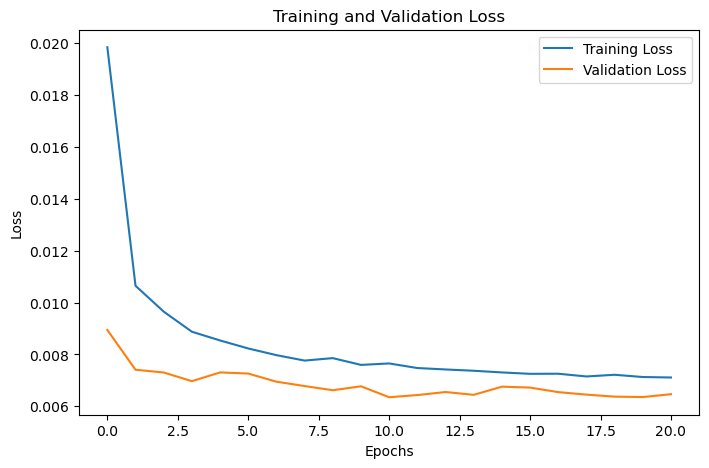

In [25]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()